# SALES ANALYSIS

Phase 1

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For better visuals
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

 Load Dataset

In [2]:
# Load the dataset  
df = pd.read_csv(r"C:\Users\Tab & Tech\Downloads\archive\train.csv")

# Display basic info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


 Data Cleaning

In [3]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

# Fill missing Postal Codes with 0
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# Extract Year, Month, and Month Name
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Month Name
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,November
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,November
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,June
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,October
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,October


Monthly Sales Analysis

In [5]:
# Group sales by month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


Top Categories and Regions

In [6]:
# Category-wise sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top Categories:\n", category_sales)

# Region-wise sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:\n", region_sales)

Top Categories:
 Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Sales by Region:
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


 Visualization

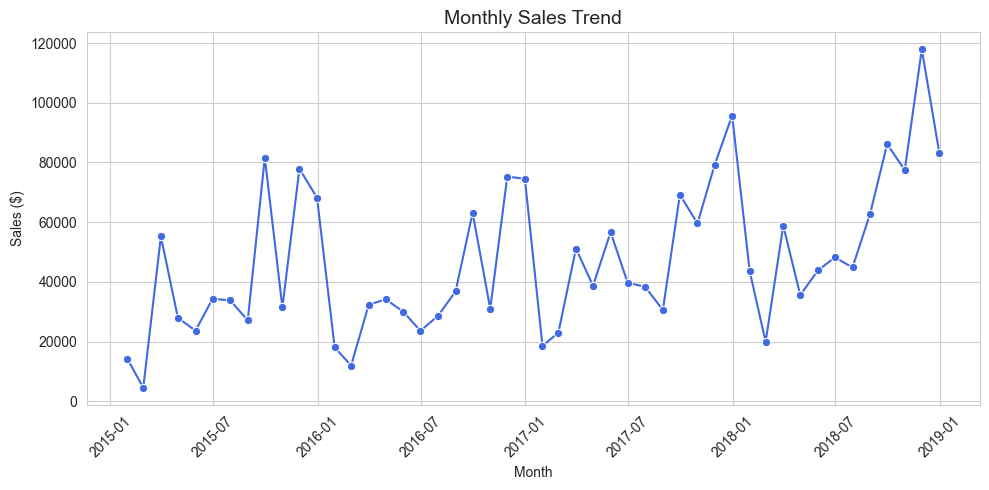

In [7]:
# Monthly Sales Trend Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Order Date', y='Sales', marker='o', color='royalblue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Save Cleaned Data

In [8]:
os.makedirs("output_phase1", exist_ok=True)
df.to_csv("output_phase1/cleaned_sales_data.csv", index=False)
monthly_sales.to_csv("output_phase1/monthly_sales.csv", index=False)
print("Data saved in 'output_phase1' folder")

Data saved in 'output_phase1' folder
